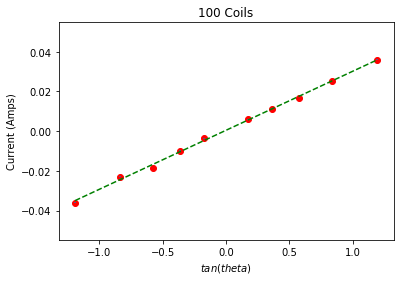

Slope =  0.02972118582850244   Amps
Error in slope =  4.367467146071569e-05   Amps
Goodness of fit =  908.0281672910289


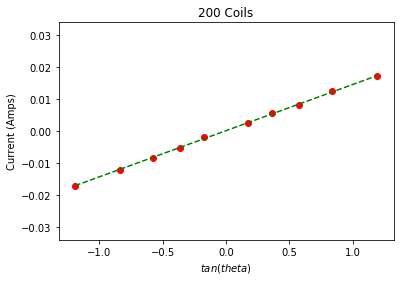

Slope =  0.01444186899868047   Amps
Error in slope =  4.367467146071569e-05   Amps
Goodness of fit =  60.27522733136305


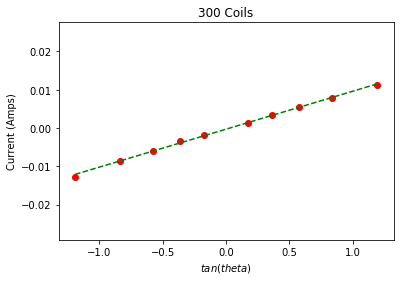

Slope =  0.009908246761705077   Amps
Error in slope =  4.367467146071569e-05   Amps
Goodness of fit =  118.35051452304708
 
B_Earth from 100 coils = 1.713245120271566e-05 +/- 1.571986125454825e-06(T)
B_Earth from 200 coils = 1.664971359646266e-05 +/- 1.5283263157967864e-06(T)
B_Earth from 300 coils = 1.7134500130198637e-05 +/- 1.5737858454857851e-06(T)
Accepted B_Earth       = 1.84307E-05


In [11]:
##EARTHS MAGNETIC FIELD##
import numpy as np
import physplot as phys
from __future__ import division

def rule3(dA,dB,dC=0.0,dD=0.0,dE=0.0,dF=0.0,dG=0.0,dH=0.0,dI=0.0):
    return np.sqrt(dA**2+dB**2+dC**2+dD**2+dE**2+dF**2+dG**2+dH**2+dI**2)

def rule4(value,A,dA,B,dB,C=1.0,dC=0.0,D=1.0,dD=0.0,E=1.0,dE=0.0,F=1.0,dF=0.0,G=1.0,dG=0.0,H=1.0,dH=0.0,I=1.0,dI=0.0):
    return value*np.sqrt((dA/A)**2+(dB/B)**2+(dC/C)**2+(dD/D)**2+(dE/E)**2+(dF/F)**2+(dG/G)**2+(dH/H)**2+(dI/I)**2)

def toRadians(angle):
    return (np.pi*angle)/180.0

M=4*np.pi*(10**-7)

r= 0.218/2.0

N1=100.

N2=200.

N3=300.

T1=np.array([-50,-40,-30,-20,-10,10,20,30,40,50])
T2=np.array([-50,-40,-30,-20,-10,10,20,30,40,50])
T3=np.array([-50,-40,-30,-20,-10,10,20,30,40,50])

I1=np.array([-0.0359,-0.0229,-0.0184,-0.0098,-0.0036,0.0059,0.0114,0.0166,0.0254,0.036])
I2=np.array([-0.0171,-0.0121,-0.0084,-0.0052,-0.0018,0.0026,0.0055,0.0083,0.0125,0.0171])
I3=np.array([-0.0128,-0.0085,-0.006,-0.0033,-0.0017,0.0013,0.0034,0.0056,0.0078,0.0112])

dr=0.01

dT1=np.array([1,1,1,1,1,1,1,1,1,1])
dT2=np.array([1,1,1,1,1,1,1,1,1,1])
dT3=np.array([1,1,1,1,1,1,1,1,1,1])

dI1=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])
dI2=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])
dI3=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])

x1 = np.tan(toRadians(T1))
y1 = I1
dy1 = dI1

x2 = np.tan(toRadians(T2))
y2 = I2
dy2 = dI2

x3 = np.tan(toRadians(T3))
y3 = I3
dy3 = dI3

#plotfit takes in parameters in this order
#phys.plotfit(x,y,dy,title,'xlabel(units)','ylabel(units)','slope units')  Slope units will not render in LaTeX

phys.plotfit(x1,y1,dy1,'100 Coils','$tan(theta)$','Current (Amps)','Amps')
dm1 = np.sqrt(1/((sum(1/dy1**2))*(sum(x1**2/dy1**2))-(sum(x1/dy1**2))**2)*sum(1/dy1**2))

phys.plotfit(x2,y2,dy2,'200 Coils','$tan(theta)$','Current (Amps)','Amps')
dm2 = np.sqrt(1/((sum(1/dy2**2))*(sum(x2**2/dy2**2))-(sum(x2/dy2**2))**2)*sum(1/dy2**2))

phys.plotfit(x3,y3,dy3,'300 Coils','$tan(theta)$','Current (Amps)','Amps')
dm3 = np.sqrt(1/((sum(1/dy3**2))*(sum(x3**2/dy3**2))-(sum(x3/dy3**2))**2)*sum(1/dy3**2))

m1=np.polynomial.polynomial.polyfit(x1,y1,1,w=dy1)[1]
m2=np.polynomial.polynomial.polyfit(x2,y2,1,w=dy2)[1]
m3=np.polynomial.polynomial.polyfit(x3,y3,1,w=dy3)[1]

dB1=rule4((((M*N1)/(2.0*r))*m1),r,dr,m1,dm1)
dB2=rule4((((M*N2)/(2.0*r))*m2),r,dr,m2,dm2)
dB3=rule4((((M*N3)/(2.0*r))*m3),r,dr,m3,dm3)

print(" ")

print("B_Earth from 100 coils = " +str(((M*N1)/(2.0*r))*m1)+ " +/- "+str(dB1) +'(T)')
print("B_Earth from 200 coils = " +str(((M*N2)/(2.0*r))*m2)+ " +/- "+str(dB2) +'(T)')
print("B_Earth from 300 coils = " +str(((M*N3)/(2.0*r))*m3)+ " +/- "+str(dB3) +'(T)')

print("Accepted B_Earth       = 1.84307E-05")